# Introduction

The dataset used in this project is from a financial services company that provides loans to customers based on their personal and financial information submitted during the loan application process. The main objective is to automate the loan approval decision by building a classification model that predicts whether a given applicant is eligible for a home loan or not.

# Dataset

The dataset used in this notebook is available on Kaggle: https://www.kaggle.com/datasets/krishnaraj30/finance-loan-approval-prediction-data/data?select=test.csv

## Dataset Information

This dataset contains information about home loan applications, including both categorical and numerical variables. The target variable is the loan approval status (approved or not approved).

## Columns in the Dataset
*  **Loan ID:** Unique identifier for each loan application
*  **Gender:** Gender of the applicant (Male/Female)
*  **Married:** Marital status (Yes/No)
*  **Dependents:** Number of dependents (0, 1, 2, 3+)
*  **Education:** Education level (Graduate/Not Graduate)
*  **Self Employed:** Self-employment status (Yes/No)
*  **Applicant Income:** Income of the applicant
*  **Coapplicant Income:** Income of the co-applicant
*  **Loan Amount:** Amount of loan applied for
*  **Loan Amount Term:** Loan Term (in months)
*  **Credit History:** Credit history (1 = good, 0 = bad)
*  **Property Area:** Urban/Semiurban/Rural
*  **Loan Status:** Loan approval status (Y = approved, N = not approved)







In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import time
#to suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Exploratory Data Analysis

**Data Loading**

Importing the dataset and checking for any missing values

In [ ]:
# reading the data
file =('train.csv')
df = pd.read_csv(file)

# displaying the contents of the CSV file
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Display the column names of the dataframe
pd.DataFrame(df.columns, columns=["name"])

,name
0,Loan_ID
1,Gender
2,Married
3,Dependents
4,Education
5,Self_Employed
6,ApplicantIncome
7,CoapplicantIncome
8,LoanAmount
9,Loan_Amount_Term


Getting Insights About The Dataset

In [ ]:
df.shape

(614, 13)

This means that this dataset has 614 rows and 13 columns.

In [ ]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Get statistical summary
df.describe(include="all")  #Description of the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
#Checking missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Missing values are present in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History.

In [ ]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(f"  Total unique values: {len(unique_vals)}")
    print(f"  Sample values: {unique_vals[:10]}")


Unique values in categorical columns:

Loan_ID:
  Total unique values: 614
  Sample values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020']

Gender:
  Total unique values: 3
  Sample values: ['Male' 'Female' nan]

Married:
  Total unique values: 3
  Sample values: ['No' 'Yes' nan]

Dependents:
  Total unique values: 5
  Sample values: ['0' '1' '2' '3+' nan]

Education:
  Total unique values: 2
  Sample values: ['Graduate' 'Not Graduate']

Self_Employed:
  Total unique values: 3
  Sample values: ['No' 'Yes' nan]

Property_Area:
  Total unique values: 3
  Sample values: ['Urban' 'Rural' 'Semiurban']

Loan_Status:
  Total unique values: 2
  Sample values: ['Y' 'N']


## Data Visualization
Now, let's visualize the data to gain further insights into the distributions and relationships between variables.

## Univariate Visual Analysis

We will start with univariate analysis to understand the distribution of individual features.

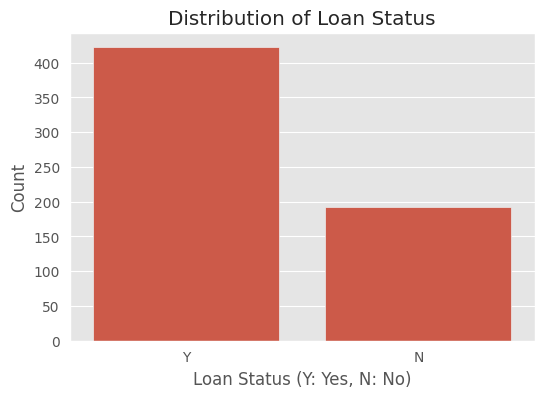


Value counts for Loan_Status:
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


In [ ]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (Y: Yes, N: No)')
plt.ylabel('Count')
plt.show()

# Print the value counts for Loan_Status
print("\nValue counts for Loan_Status:")
print(df['Loan_Status'].value_counts(normalize=True) * 100)

The majority of the loan applications in this dataset were approved (approximately 68.7%). This indicates an imbalanced class distribution, which may affect model performance.

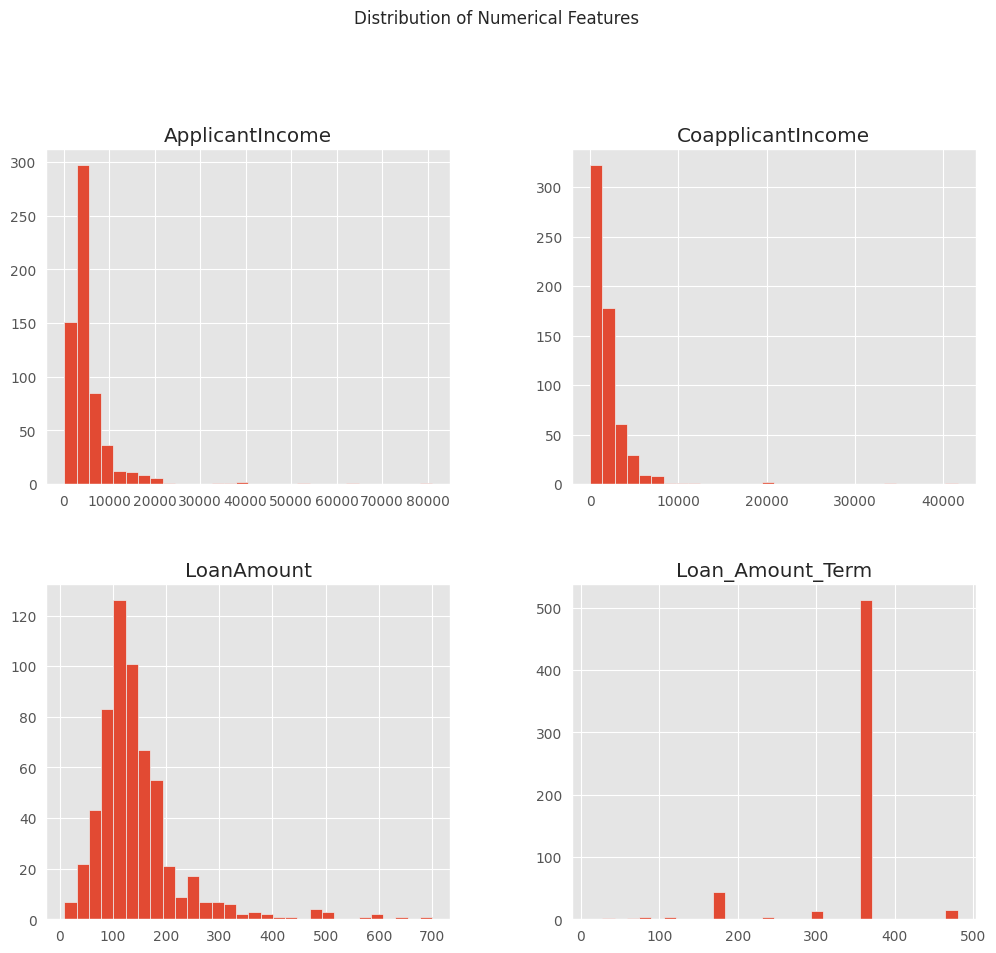

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
# Distribution of Numerical Features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[numerical_features].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

df['Loan_Amount_Term'].value_counts()

### Interpretation
* Applicant Income and Co-applicant Income show a right-skewed distribution, indicating that most applicants and co-applicants have lower incomes, with a few having significantly higher incomes.
* Loan Amount also appears to be right-skewed, suggesting that most loan amounts are on the lower side.
* Loan Amount Term seems to have a concentration around 360 months, which is typical for home loans.

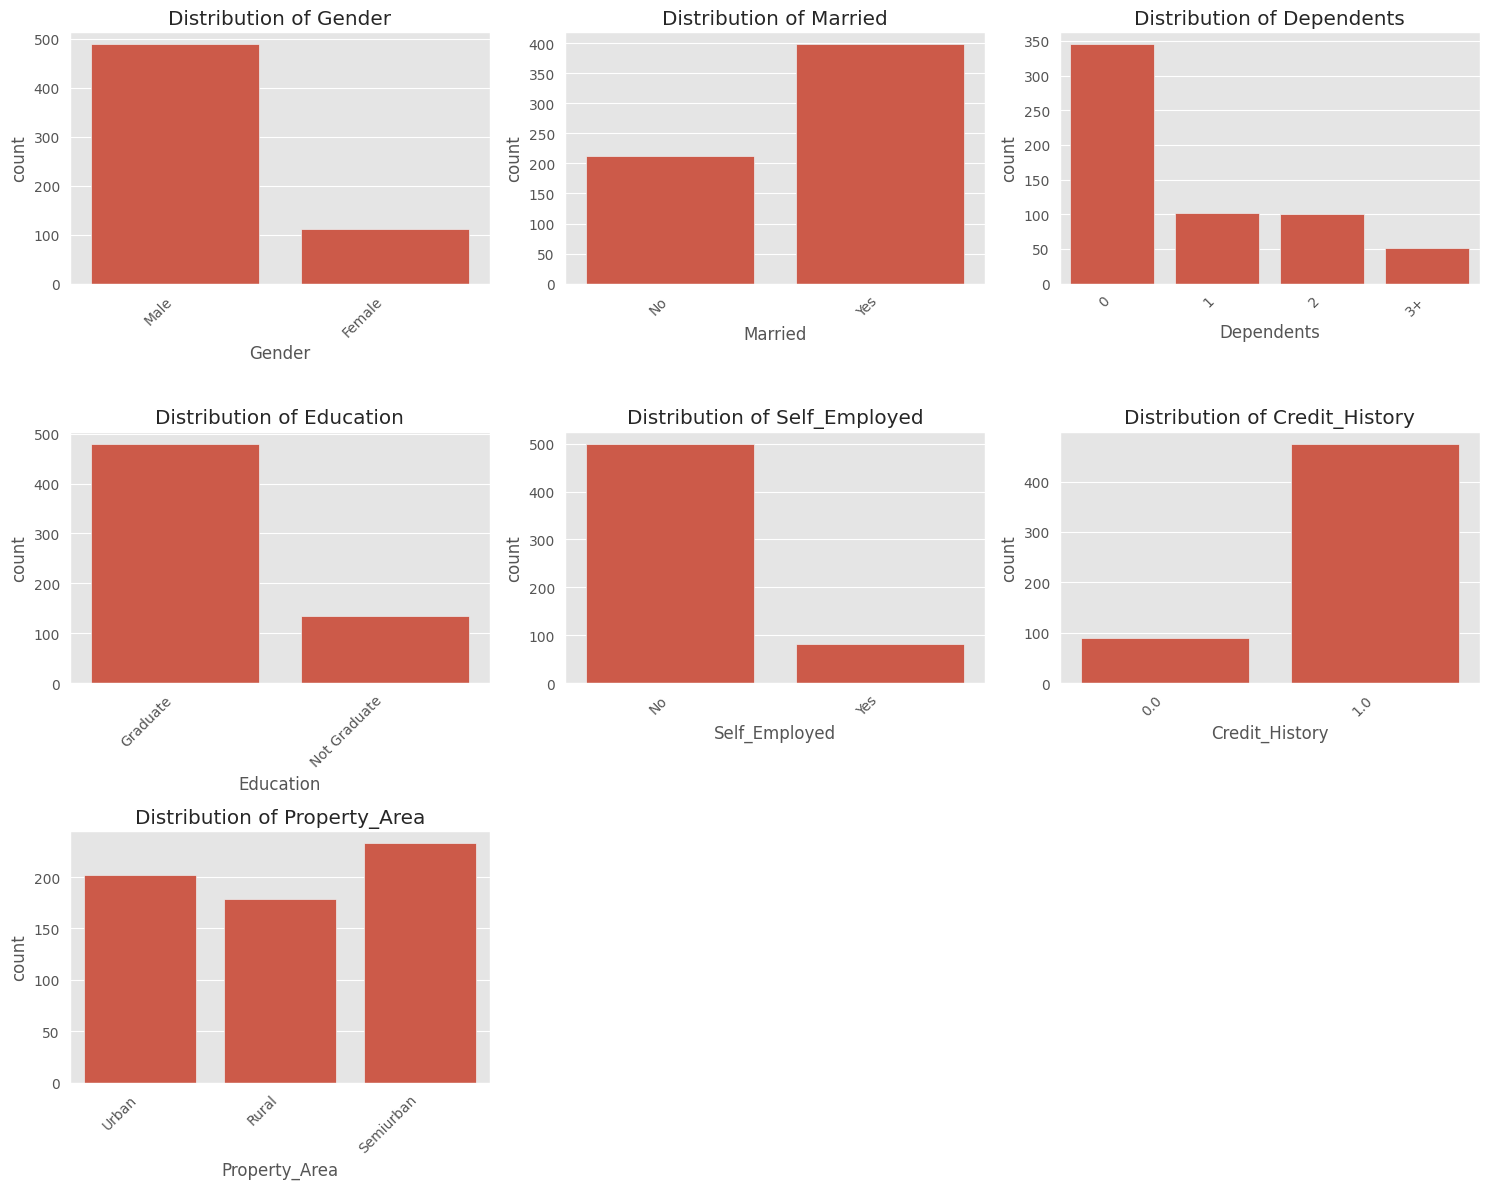


Value counts for Gender:
Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

Value counts for Married:
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

Value counts for Dependents:
Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64

Value counts for Education:
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

Value counts for Self_Employed:
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

Value counts for Credit_History:
Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64

Value counts for Property_Area:
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64


In [ ]:
# Distribution of Categorical Features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print value counts for categorical features
for feature in categorical_features:
    print(f"\nValue counts for {feature}:")
    print(df[feature].value_counts(normalize=True) * 100)

### Interpretation
* **Gender:** The majority of applicants are male (approximately 81.4%).
* **Married:** Most applicants are married (approximately 65.1%).
* **Dependents:** A significant portion of applicants have 0 dependents (approximately 57.6%), followed by 1 and 2 dependents.
* **Education:** Most applicants are graduates (approximately 78.9%).
* **Self_Employed:** The majority of applicants are not self-employed (approximately 85.9%).
* **Credit_History:** A large percentage of applicants have a credit history (approximately 84.2%).
* **Property_Area:** The distribution of applicants across different property areas is somewhat balanced, with Semi Urban having the highest percentage (approximately 37.9%).

## Bivariate Analysis
We will explore the relationships between different features and the target variable.

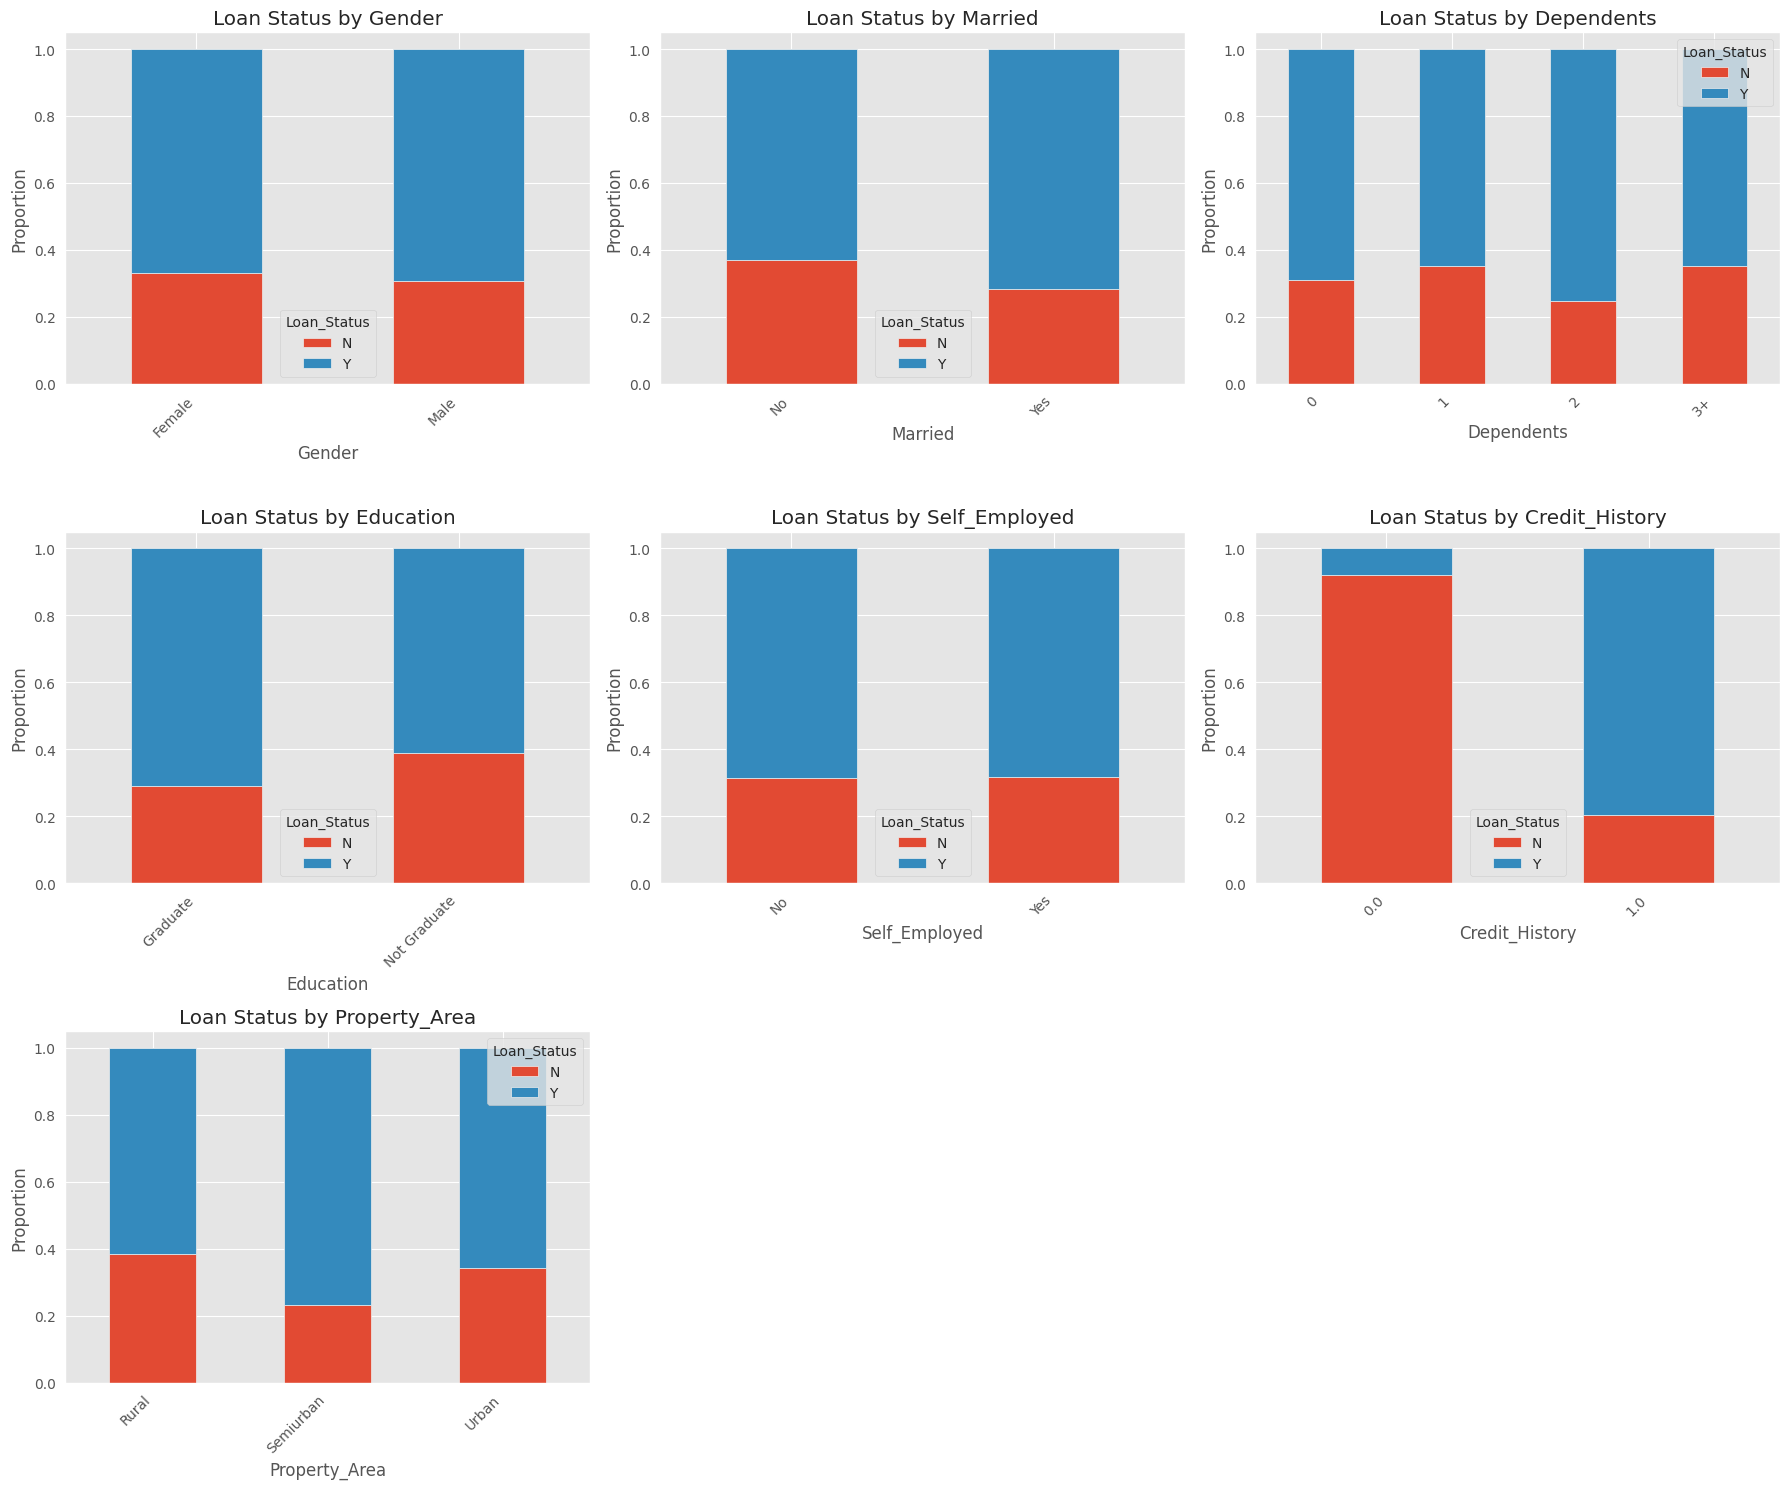

In [ ]:
# Loan Status vs. Categorical Features
categorical_features_bivariate = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
plt.figure(figsize=(18, 15))

for i, feature in enumerate(categorical_features_bivariate):
    plt.subplot(3, 3, i + 1)

    proportions = pd.crosstab(df[feature], df['Loan_Status'], normalize='index')
    proportions.plot(kind='bar', stacked=True, ax=plt.gca())

    plt.title(f'Loan Status by {feature}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Interpretation
* **Gender:** A slightly higher proportion of males tend to get their loans approved compared to females.
* **Married:** Married applicants have a higher loan approval rate than unmarried applicants.
* **Dependents:** Applicants with 0 or 2 dependents seem to have a slightly higher approval rate.
* **Education:** Graduates have a higher loan approval rate compared to non-graduates.
* **Self Employed:** Non-self-employed applicants have a slightly higher loan approval rate.
* **Credit History:** Applicants with a credit history (Credit_History = 1.0) have a significantly higher chance of loan approval. This appears to be a strong predictor.
* **Property Area:** Applicants from Semi Urban areas have higher loan approval rate.

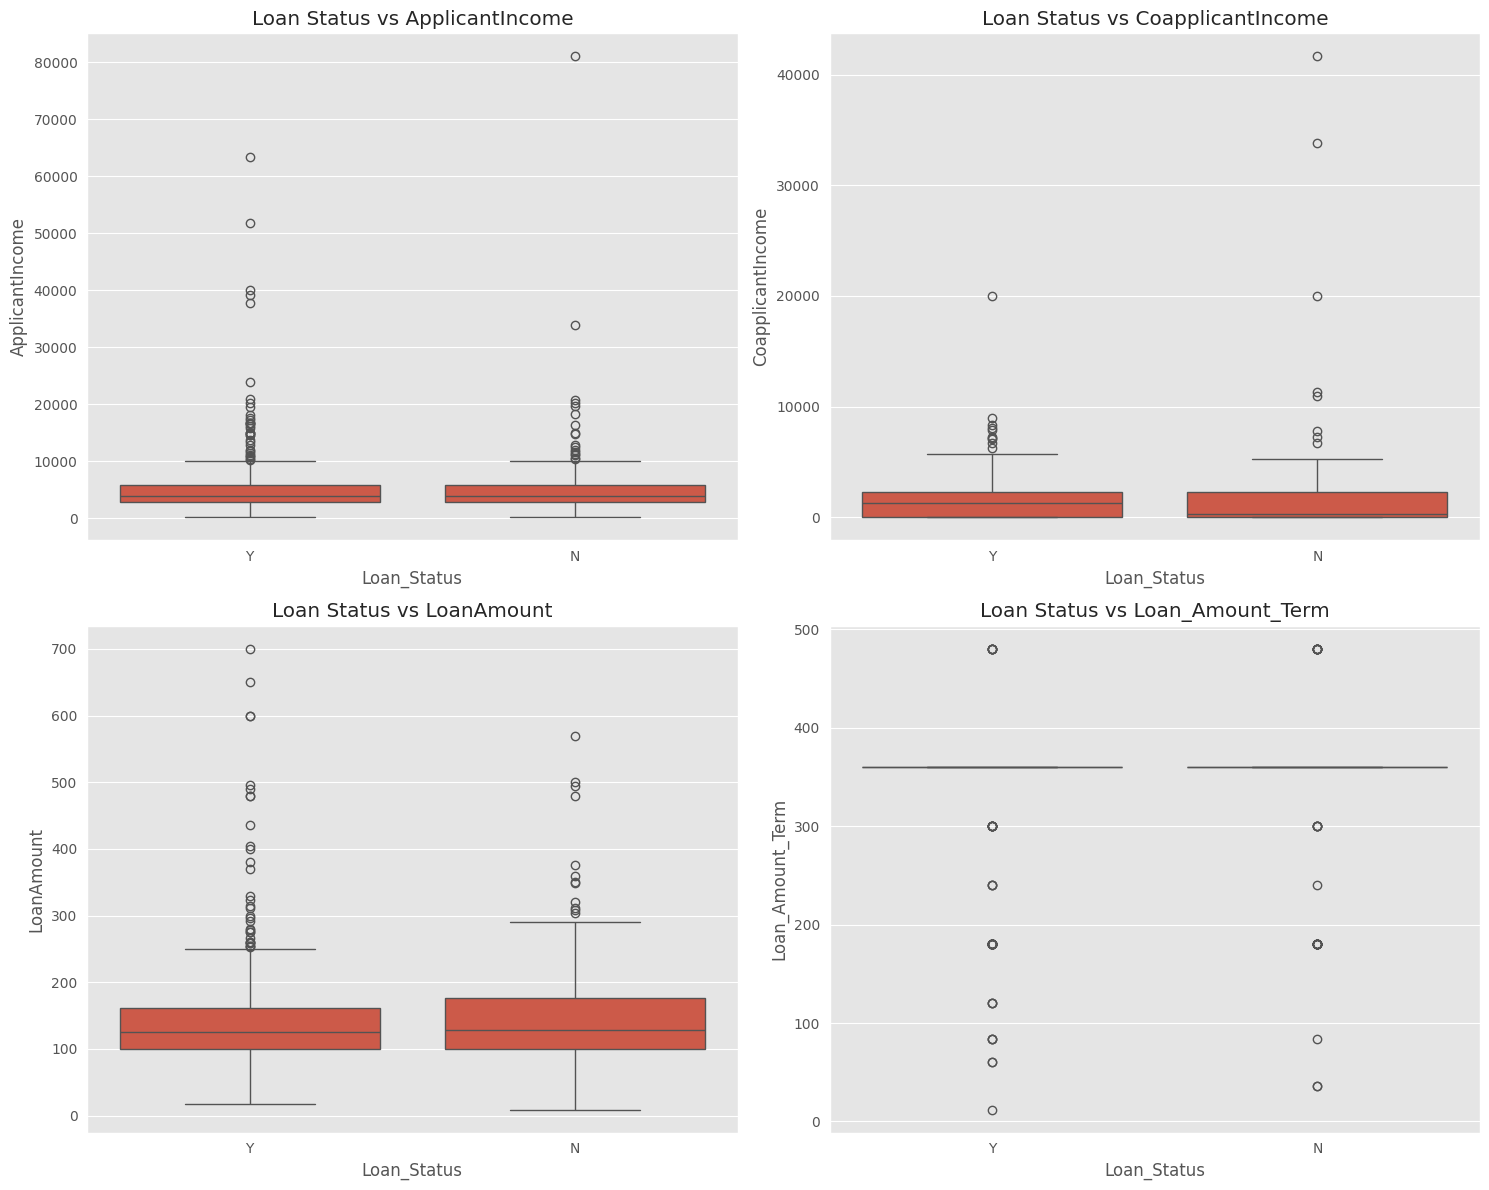

In [ ]:
# Loan Status vs. Numerical Features
numerical_features_bivariate = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features_bivariate):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Loan_Status', y=feature, data=df)
    plt.title(f'Loan Status vs {feature}')
plt.tight_layout()
plt.show()

## Interpretation

* **Applicant Income:** There isn't a very clear distinction in applicant income between approved and rejected loans, although the median income for approved loans seems slightly lower. There are more outliers with higher income among approved loans.
* **Co-applicant Income:** It shows that if the co-applicant's income is less then, the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it.
* **Loan Amount:** The median loan amount for approved loans appears to be slightly lower than that for rejected loans.
* **Loan Amount Term:** The distribution of loan term doesn't seem to vary significantly between approved and rejected loans, with the majority having a term of 360 months.

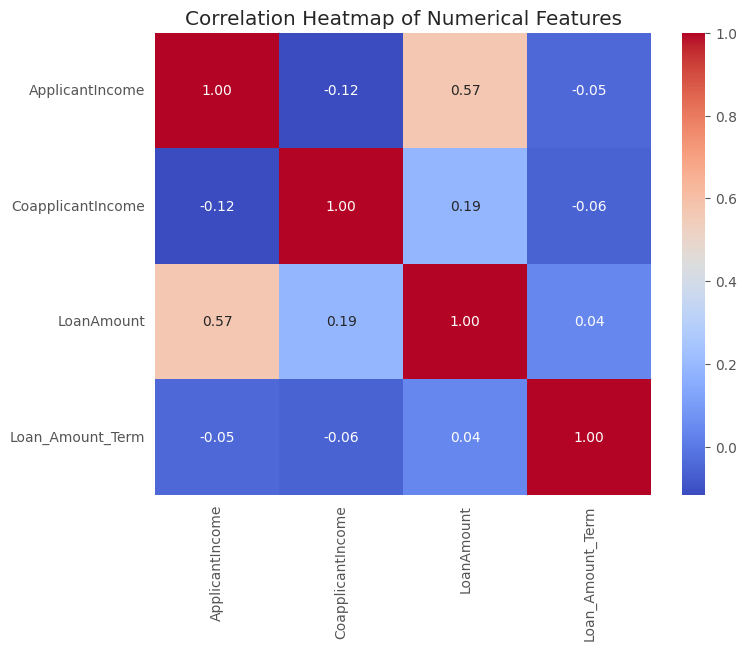

In [ ]:
# Visualizing Correlation via Heatmap
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Interpretation
* There is a weak positive correlation between Applicant Income and Loan Amount (0.57), suggesting that applicants with higher incomes tend to take out larger loans.
* There is a very weak positive correlation between Co-applicant Income and Loan Amount (0.19).
* The other correlations between the numerical features are also relatively weak.

### Data Preprocessing and Feature Engineering
Before we can implement the machine learning models, we need to preprocess the data. This involves handling missing values, encoding categorical features, and scaling numerical features.

**Handling missing values**

In [ ]:
# For numerical columns, we will use median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, we will use mode (most frequent value)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
# Convert 'Loan_Status' to binary (0 and 1)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

loan_ids = df['Loan_ID']
df.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
print(df.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [ ]:
print(df.shape)

(614, 12)


Now, the dataset has 614 rows, 12 columns and no missing values

**Encoding Categorical Features**

Machine learning models cannot directly work with categorical data. We need to encode these features into a numerical format. We will use one-hot encoding for the nominal categorical features and label encoding for the binary target variable.

In [ ]:
# Encode the target variable 'Loan_Status' (Y: 1, N: 0)
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [ ]:
#Apply One-Hot Encoding on nominal categorical features
nominal_categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=nominal_categorical_cols, drop_first=True)

In [ ]:
print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0         False          False                   Fa

**Splitting the dataset into train and test sets (80% train, 20% test)**

In [ ]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 14)
(123, 14)
(491,)
(123,)


**Feature Scaling**

In [ ]:
numerical_cols_scaled = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[numerical_cols_scaled] = scaler.fit_transform(X_train[numerical_cols_scaled])
X_test[numerical_cols_scaled] = scaler.transform(X_test[numerical_cols_scaled])


In [ ]:
print(X_train.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
154        -0.352802          -0.563228   -1.131588          0.280691   
239        -0.343346          -0.563228   -0.592309          0.280691   
448        -0.339471           0.050405    0.040758          0.280691   
471        -0.445963          -0.024953   -0.393010         -2.486768   
273        -0.451078           0.234495    0.040758          0.280691   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
154        0.397516         True        False         False         False   
239        0.397516         True         True          True         False   
448       -2.515623         True         True         False          True   
471       -2.515623         True         True          True         False   
273        0.397516         True         True         False         False   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
154          False               

# Machine Learning Models

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm which predicts the class or value of a new data point based on the majority class or average value of its 'k' nearest neighbors in the feature space, where 'k' is a user-defined parameter.

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_


# Train the model
start_time = time.time()
best_knn.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_knn = best_knn.predict(X_test)
prediction_time_knn = time.time() - start_time

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)
report_knn = classification_report(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("\n--- KNN Classifier ---")
print(f"Training Time: {training_time_knn:.4f} seconds")
print(f"Prediction Time: {prediction_time_knn:.4f} seconds")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print("\nClassification Report:\n", report_knn)
print("\nConfusion Matrix:\n", confusion_knn)


--- KNN Classifier ---
Training Time: 0.0030 seconds
Prediction Time: 0.0107 seconds
Accuracy: 0.8455
F1 Score: 0.8950

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123


Confusion Matrix:
 [[23 15]
 [ 4 81]]


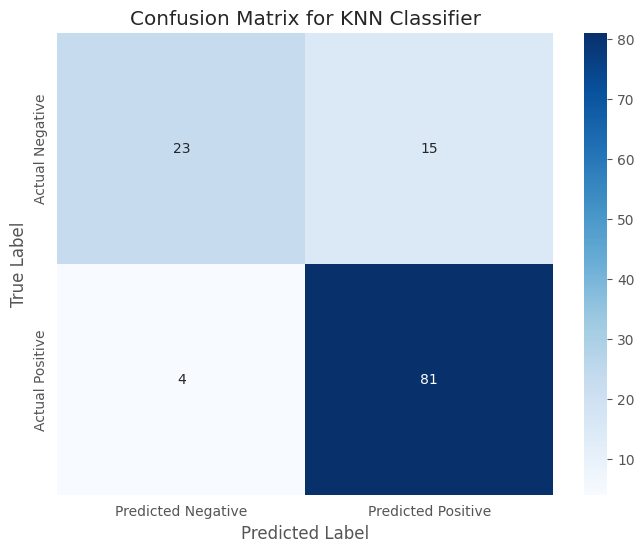

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation
The K-Nearest Neighbors (KNN) classifier achieved an overall accuracy of 84.55%, with a high F1 score of 0.8950, indicating strong performance in predicting the loan approval status. The model's precision for loan approval (class 1) is 0.84, meaning 84% of predicted loan approvals are correct, while its recall is high at 0.95, suggesting that it correctly identifies 95% of the actual loan approvals.

However, the model’s performance for rejected loans (class 0) with a recall of 0.63 and an F1-score of 0.71 suggests that the model misses 39% of loan rejections. The confusion matrix reveals that the model correctly classifies 23 loan rejections and 81 loan approvals, but it also misclassifies 15 loan rejections as approvals (false positives) and 4 loan approvals as rejections (false negatives).

## Logistic Regression

This is a classification algorithm which uses a logistic function to predict binary outcome (True/False, 0/1, Yes/No) given an independent variable. The aim of this model is to find a relationship between features and probability of particular outcome. The logistic function used is a logit function which is a log of odds in the favor of the event. Logit function develops a s-shaped curve with the probability estimate similar to a step function.

In [ ]:
logistic_regression = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# Train the model
start_time = time.time()
best_lr.fit(X_train, y_train)
training_time_lr = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_lr = best_lr.predict(X_test)
prediction_time_lr = time.time() - start_time

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)
report_lr = classification_report(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("\n--- Logistic Regression ---")
print(f"Training Time: {training_time_lr:.4f} seconds")
print(f"Prediction Time: {prediction_time_lr:.4f} seconds")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\nClassification Report:\n", report_lr)
print("\nConfusion Matrix:\n", confusion_lr)


--- Logistic Regression ---
Training Time: 0.0034 seconds
Prediction Time: 0.0017 seconds
Accuracy: 0.8618
F1 Score: 0.9081

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


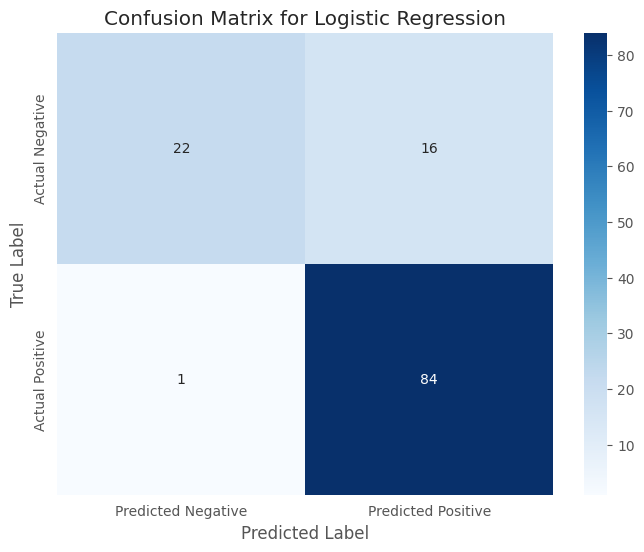

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The Logistic Regression model demonstrates strong performance in predicting loan approvals (class 1), with an F1 score of 0.9081 and an overall accuracy of 86.18%. It achieves a very high recall of 0.99 for class 1, meaning it was highly effective at identifying true positives while minimizing false negatives.The precision for class 1 is 0.84, suggesting that 84% of the predicted loan approvals are indeed correct.

However, the model's ability to correctly predict loan rejections (class 0) is weaker. While the precision is high at 0.96, meaning most predicted rejections are correct, the recall drops to 0.58, indicating that 42% of actual loan rejections are misclassified as approvals (16 out of 38).

## Trees - Decision Trees, Random Forest, AdaBoost & XGBoost

## Decision Trees

Decision Trees is a supervised machine learning algorithm mostly used for classification problems. All features should be discretized in this model, so that the population can be split into two or more homogeneous sets or subsets. This model uses a different algorithm to split a node into two or more sub-nodes. With the creation of more sub-nodes, homogeneity and purity of the nodes increases with respect to the dependent variable.

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

# Train the model
start_time = time.time()
best_dt.fit(X_train, y_train)
training_time_dt = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_dt = best_dt.predict(X_test)
prediction_time_dt = time.time() - start_time

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, pos_label=1)
report_dt = classification_report(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)


print("\n--- Decision Tree Classifier ---")
print(f"Training Time: {training_time_dt:.4f} seconds")
print(f"Prediction Time: {prediction_time_dt:.4f} seconds")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print("\nClassification Report:\n", report_dt)
print("\nConfusion Matrix:\n", confusion_dt)



--- Decision Tree Classifier ---
Training Time: 0.0052 seconds
Prediction Time: 0.0020 seconds
Accuracy: 0.8618
F1 Score: 0.9081

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


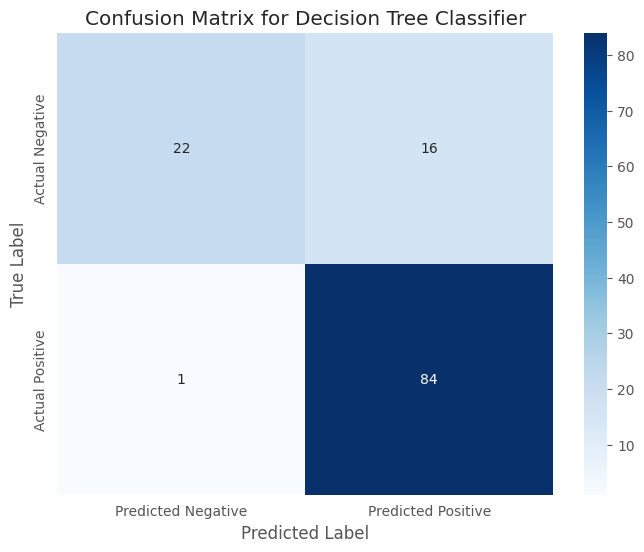

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The Decision Tree classifier achieved an overall accuracy of 86.18%, with a high F1 score of 0.9081, indicating strong performance in predicting the loan approval status.  The classification report shows a high precision (0.96) for class 0 (loan rejection) but a relatively lower recall (0.58) for the same class, indicating that the model misses a significant number of true loan rejections. For class 1 (loan approval), the model performs well with a precision of 0.84 and a recall of 0.99, suggesting it identifies most true loan approvals, but some false positives are still present.

The confusion matrix highlights this imbalance, with 22 false negatives and 16 false positives for class 0, while 84 true positives for class 1 indicate strong recall. The model's training time (0.0040 seconds) and prediction time (0.0021 seconds) are efficient.

## Random Forest

Random Forest is a tree based ensemble model which helps in improving the accuracy of the model. It combines a large number of Decision trees to build a powerful predicting model. It takes a random sample of rows and features of each individual tree to prepare a decision tree model. Final prediction class is either the mode of all the predictors or the mean of all the predictors.

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Train the model
start_time = time.time()
best_rf.fit(X_train, y_train)
training_time_rf = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_rf = best_rf.predict(X_test)
prediction_time_rf = time.time() - start_time

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)
report_rf = classification_report(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("\n--- Random Forest Classifier ---")
print(f"Training Time: {training_time_rf:.4f} seconds")
print(f"Prediction Time: {prediction_time_rf:.4f} seconds")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print("\nClassification Report:\n", report_rf)
print("\nConfusion Matrix:\n", confusion_rf)


--- Random Forest Classifier ---
Training Time: 0.1316 seconds
Prediction Time: 0.0082 seconds
Accuracy: 0.8537
F1 Score: 0.9032

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


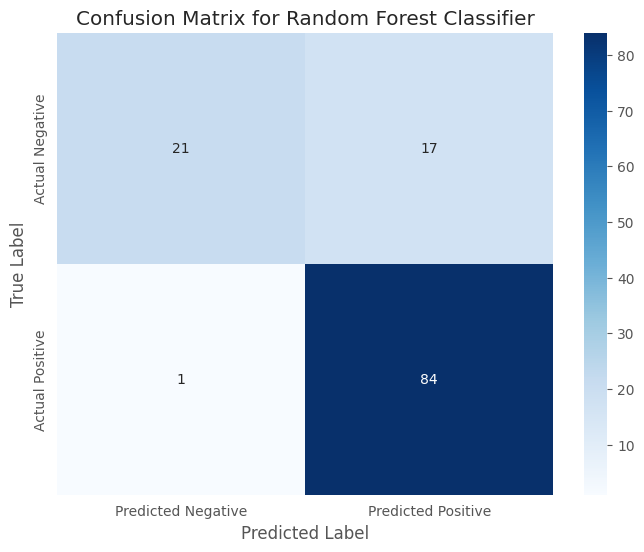

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The Random Forest classifier achieved an accuracy of 85.37% and a strong F1 score of 0.9032. It was particularly effective in predicting loan approvals (class 1), achieving a high recall of 0.99 and precision of 0.83, meaning it correctly identified nearly all actual approvals with few false positives.

However, for class 0 (loan rejections), while precision is high (0.95), recall drops to 0.55, suggesting the model struggles to identify all rejections correctly. This is reflected in the confusion matrix, where 17 false positives are observed for class 0. The model's training time (0.0925 seconds) is longer than the Decision Tree due to its ensemble nature, but prediction time (0.0060 seconds) remains efficient. Overall, Random Forest performs comparably to the Decision Tree, with slightly lower accuracy and F1 score, indicating its performance is at par with the Decision Tree while offering better generalization at the cost of higher training time.


## AdaBoost

Adaptive Boosting (AdaBoost) is a powerful ensemble learning method that combines multiple weak learners (typically decision trees) to create a strong learner. It works sequentially, where each weak learner is trained to focus on the data points that were misclassified by the previous learners.

In [ ]:
# Initialize AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_ab = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ab, cv=5, scoring='f1')
grid_search_ab.fit(X_train, y_train)
best_ab = grid_search_ab.best_estimator_

# Train the model
start_time = time.time()
best_ab.fit(X_train, y_train)
training_time_ab = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_ab = best_ab.predict(X_test)
prediction_time_ab = time.time() - start_time

# Evaluate the model
accuracy_ab = accuracy_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab, pos_label=1)
report_ab = classification_report(y_test, y_pred_ab)
confusion_ab = confusion_matrix(y_test, y_pred_ab)


print("\n--- AdaBoost Classifier ---")
print(f"Training Time: {training_time_ab:.4f} seconds")
print(f"Prediction Time: {prediction_time_ab:.4f} seconds")
print(f"Accuracy: {accuracy_ab:.4f}")
print(f"F1 Score: {f1_ab:.4f}")
print("\nClassification Report:\n", report_ab)
print("\nConfusion Matrix:\n", confusion_ab)


--- AdaBoost Classifier ---
Training Time: 0.1128 seconds
Prediction Time: 0.0112 seconds
Accuracy: 0.8537
F1 Score: 0.9032

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


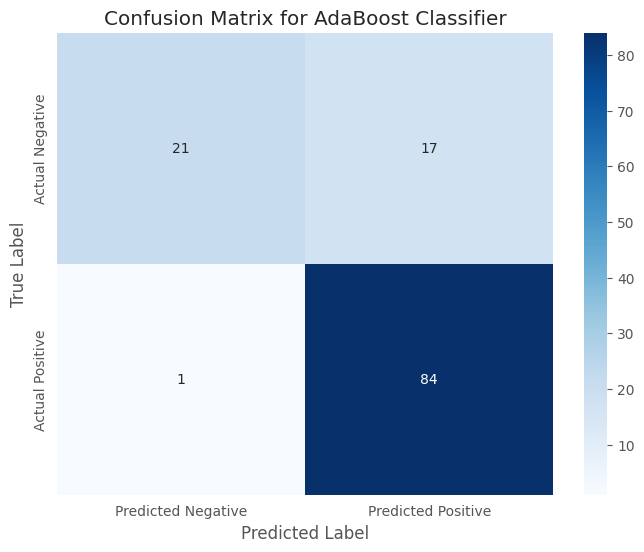

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_ab, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The AdaBoost classifier achieved an accuracy of 85.37% and an F1 score of 0.9032, which is identical to the Random Forest model. It demonstrates high effectiveness in detecting positive class instances (loan approvals), with recall at 0.99 and precision at 0.83 for class 1. However, similar to Random Forest, it struggles with correctly identifying the negative class (loan rejections), with recall dropping to 0.55, leading to 17 false positives as shown in the confusion matrix.

The model's training time (0.1192 seconds) and prediction time (0.0147 seconds) are higher than those of both the Decision Tree and Random Forest. This is because it works sequentially, where each weak learner is trained to focus on the data points that were misclassified by the previous learners.

## XGBoost

Extreme Gradient Boosting (XG Boost) algorithm only works with the quantitative variable. It is a gradient boosting algorithm which forms strong rules for the model by boosting weak learners to a strong learner. It is a fast and efficient algorithm which recently dominated machine learning because of its high performance and speed.

In [ ]:
xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='f1')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_


# Train the model
start_time = time.time()
best_xgb.fit(X_train, y_train)
training_time_xgb = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_xgb = best_xgb.predict(X_test)
prediction_time_xgb = time.time() - start_time

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)
report_xgb = classification_report(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("\n--- XGBoost Classifier ---")
print(f"Training Time: {training_time_xgb:.4f} seconds")
print(f"Prediction Time: {prediction_time_xgb:.4f} seconds")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print("\nClassification Report:\n", report_xgb)
print("\nConfusion Matrix:\n", confusion_xgb)


--- XGBoost Classifier ---
Training Time: 0.0680 seconds
Prediction Time: 0.0084 seconds
Accuracy: 0.8537
F1 Score: 0.9032

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Confusion Matrix:
 [[21 17]
 [ 1 84]]


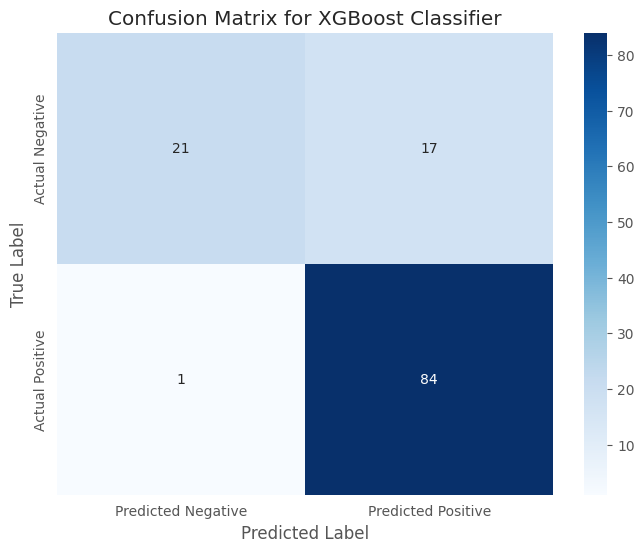

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The XGBoost classifier achieved an accuracy of 85.37% and an F1 score of 0.9032, which is identical to the performance of both the AdaBoost and Random Forest models. It performs exceptionally well in identifying the positive class (loan approvals), with a recall of 0.99 and a precision of 0.83 for class 1. However, like the other ensemble models, it struggles with the negative class (loan rejections), where the recall drops to 0.55, resulting in 17 false positives as shown in the confusion matrix.

In terms of computation time, XGBoost is the most efficient among the ensemble models tested. It has a training time of 0.0464 seconds and a prediction time of 0.0073 seconds, both significantly lower than AdaBoost and Random Forest. This efficiency, combined with its strong predictive performance, makes XGBoost a highly effective and scalable choice for classification tasks.

## Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In classification, SVM aims to find the optimal hyperplane that best separates data points of different classes with the maximum margin. The hyperplane is chosen to maximize the distance between the closest data points of each class, known as support vectors. SVM can handle both linear and non-linear data using kernel functions, which map data to higher dimensions to find a separating hyperplane.

In [ ]:
# Initialize SVM classifier
svm = SVC(random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

# Make predictions on the test set
start_time = time.time()
y_pred_svm = best_svm.predict(X_test)
prediction_time_svm = time.time() - start_time

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
report_svm = classification_report(y_test, y_pred_svm)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

print("\n--- SVM Classifier ---")
print(f"Prediction Time: {prediction_time_svm:.4f} seconds")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print("\nClassification Report:\n", report_svm)
print("\nConfusion Matrix:\n", confusion_svm)



--- SVM Classifier ---
Prediction Time: 0.0044 seconds
Accuracy: 0.8455
F1 Score: 0.8984

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


Confusion Matrix:
 [[20 18]
 [ 1 84]]


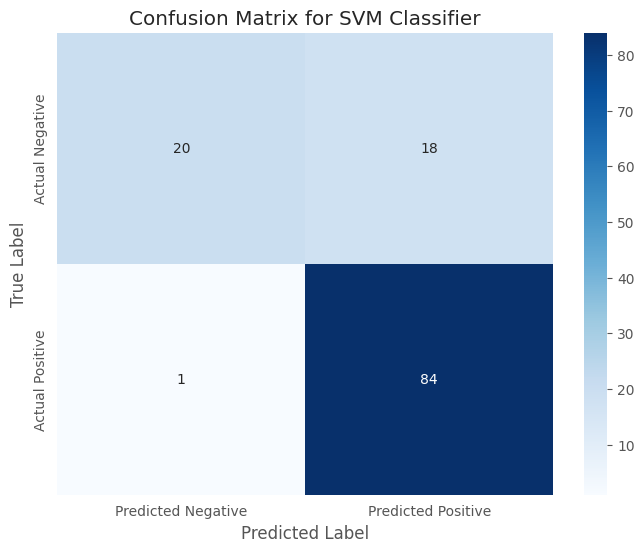

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The SVM classifier achieved an accuracy of 84.55% and an F1 score of 0.8984, which reflects strong performance in identifying positive class instances (loan approvals) with a high recall of 0.99. However, it struggles with correctly identifying the negative class (loan rejections), as indicated by a recall of 0.53 for class 0, leading to 18 false positives. The model's precision for class 1 is 0.82, showing a decent balance between precision and recall. The prediction time is notably fast at 0.0042 seconds, indicating the model is efficient in making predictions.

## Multi-layer Perceptron(MLP)

A Multi-layer Perceptron (MLP) is a class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

In [ ]:
neural_network = MLPClassifier(random_state=42, max_iter=300)

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search_nn = GridSearchCV(MLPClassifier(random_state=42, max_iter=300), param_grid_nn, cv=5, scoring='f1')
grid_search_nn.fit(X_train, y_train)
best_nn = grid_search_nn.best_estimator_

# Train the model
start_time = time.time()
best_nn.fit(X_train, y_train)
training_time_nn = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_nn = best_nn.predict(X_test)
prediction_time_nn = time.time() - start_time

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn, pos_label=1)
report_nn = classification_report(y_test, y_pred_nn)
confusion_nn = confusion_matrix(y_test, y_pred_nn)


print("\n--- MLP Classifier ---")
print(f"Training Time: {training_time_nn:.4f} seconds")
print(f"Prediction Time: {prediction_time_nn:.4f} seconds")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")
print("\nClassification Report:\n", report_nn)
print("\nConfusion Matrix:\n", confusion_nn)


--- MLP Classifier ---
Training Time: 0.3684 seconds
Prediction Time: 0.0025 seconds
Accuracy: 0.8618
F1 Score: 0.9081

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


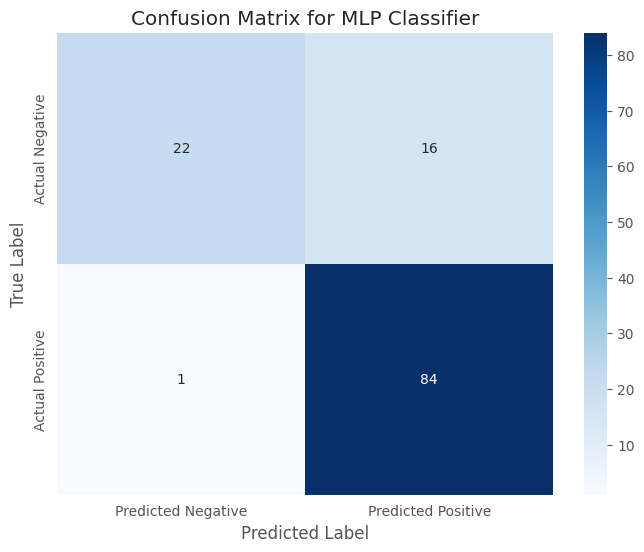

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for MLP Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The MLP classifier achieved an accuracy of 86.18% and an F1 score of 0.9081, indicating a strong performance, particularly in detecting positive class instances (loan approvals), with a high recall of 0.99. However, it faced challenges in correctly identifying the negative class (loan rejections), with a recall of 0.58 for class 0, leading to 16 false positives. The precision for class 1 is 0.84, suggesting a good balance between precision and recall. The training time of 0.3149 seconds is notably higher than the other models, while the prediction time is efficient at 0.0018 seconds.

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to transform a large set of possibly correlated variables into a smaller set of uncorrelated variables called principal components. These principal components are ordered by the amount of variance they explain in the original data, with the first principal component explaining the most variance, the second explaining the second most, and so on. By selecting a subset of the most important principal components, PCA can reduce the dimensionality of the data while preserving as much information as possible.

In [ ]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500],
}

grid_search = GridSearchCV(estimator=lr_pca, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
best_pca = grid_search.best_estimator_

# Train the model on PCA transformed data
start_time = time.time()
best_pca.fit(X_train_pca, y_train)
training_time_lr_pca = time.time() - start_time

# Make predictions on the test set
start_time = time.time()
y_pred_lr_pca = best_pca.predict(X_test_pca)
prediction_time_lr_pca = time.time() - start_time

# Evaluate the model
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
f1_lr_pca = f1_score(y_test, y_pred_lr_pca, pos_label=1)
report_lr_pca = classification_report(y_test, y_pred_lr_pca)
confusion_lr_pca = confusion_matrix(y_test, y_pred_lr_pca)

print("\n--- Logistic Regression with PCA (10 components) ---")
print(f"Training Time: {training_time_lr_pca:.4f} seconds")
print(f"Prediction Time: {prediction_time_lr_pca:.4f} seconds")
print(f"Accuracy: {accuracy_lr_pca:.4f}")
print(f"F1 Score: {f1_lr_pca:.4f}")
print("\nClassification Report:\n", report_lr_pca)
print("\nConfusion Matrix:\n", confusion_lr_pca)


--- Logistic Regression with PCA (10 components) ---
Training Time: 0.0036 seconds
Prediction Time: 0.0004 seconds
Accuracy: 0.8618
F1 Score: 0.9081

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


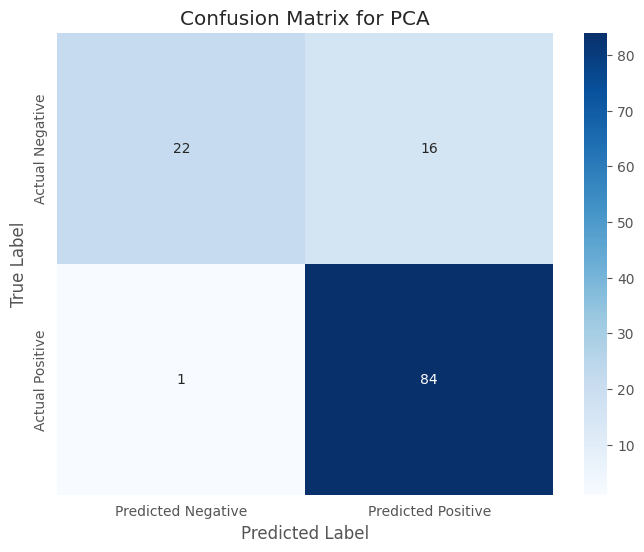

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr_pca, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for PCA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Observation

The Logistic Regression model with PCA (using 10 components) performed with an accuracy of 86.18% and an F1 score of 0.9081, which is identical to the MLP CLassifier model's performance.  This is because PCA, in this case, did not significantly reduce the dimensionality of the features. While it aimed to reduce the features, the dataset's characteristics resulted in retaining 10 principal components. This explains the identical performance to standard Logistic Regression.

The model showed strong recall for the positive class (loan approvals) at 0.99, indicating a good ability to correctly identify loan approvals. However, it continued to face challenges with classifying the negative class (loan rejections), with a recall of 0.58, leading to 16 false positives. The training time of 0.0028 seconds and prediction time of 0.0003 seconds were very efficient, reflecting the effectiveness of PCA in reducing dimensionality while maintaining model performance.

# Comparison of Models

In [ ]:
model_results = {
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'SVM', 'MLP', 'Logistic Regression with PCA'],
    'Accuracy': [accuracy_knn, accuracy_lr, accuracy_dt, accuracy_rf, accuracy_ab, accuracy_xgb, accuracy_svm, accuracy_nn, accuracy_lr_pca],
    'F1 Score': [f1_knn, f1_lr, f1_dt, f1_rf, f1_ab, f1_xgb, f1_svm, f1_nn, f1_lr_pca],
    'Training Time (s)': [training_time_knn, training_time_lr, training_time_dt, training_time_rf, training_time_ab, training_time_xgb, np.nan, training_time_nn, training_time_lr_pca],  # np.nan for SVM as it was not measured
    'Prediction Time (s)': [prediction_time_knn, prediction_time_lr, prediction_time_dt, prediction_time_rf, prediction_time_ab, prediction_time_xgb, prediction_time_svm, prediction_time_nn, prediction_time_lr_pca]
}

results_df = pd.DataFrame(model_results)

print(results_df)

results_df = results_df.sort_values(by=['Accuracy'], ascending=False)
print("\nSorted by Accuracy (Descending):\n", results_df)

                          Model  Accuracy  F1 Score  Training Time (s)  \
0                           KNN  0.845528  0.895028           0.003034   
1           Logistic Regression  0.861789  0.908108           0.003351   
2                 Decision Tree  0.861789  0.908108           0.005203   
3                 Random Forest  0.853659  0.903226           0.131644   
4                      AdaBoost  0.853659  0.903226           0.112832   
5                       XGBoost  0.853659  0.903226           0.067967   
6                           SVM  0.845528  0.898396                NaN   
7                           MLP  0.861789  0.908108           0.368415   
8  Logistic Regression with PCA  0.861789  0.908108           0.003592   

   Prediction Time (s)  
0             0.010697  
1             0.001697  
2             0.002028  
3             0.008222  
4             0.011168  
5             0.008436  
6             0.004357  
7             0.002468  
8             0.000433  

Sorted b

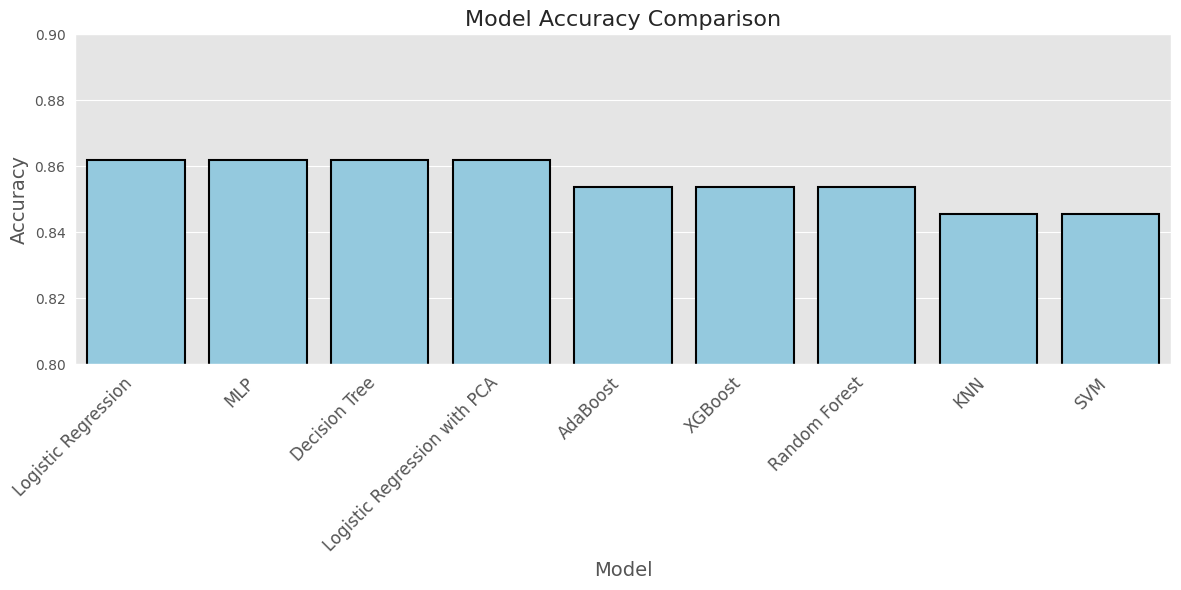

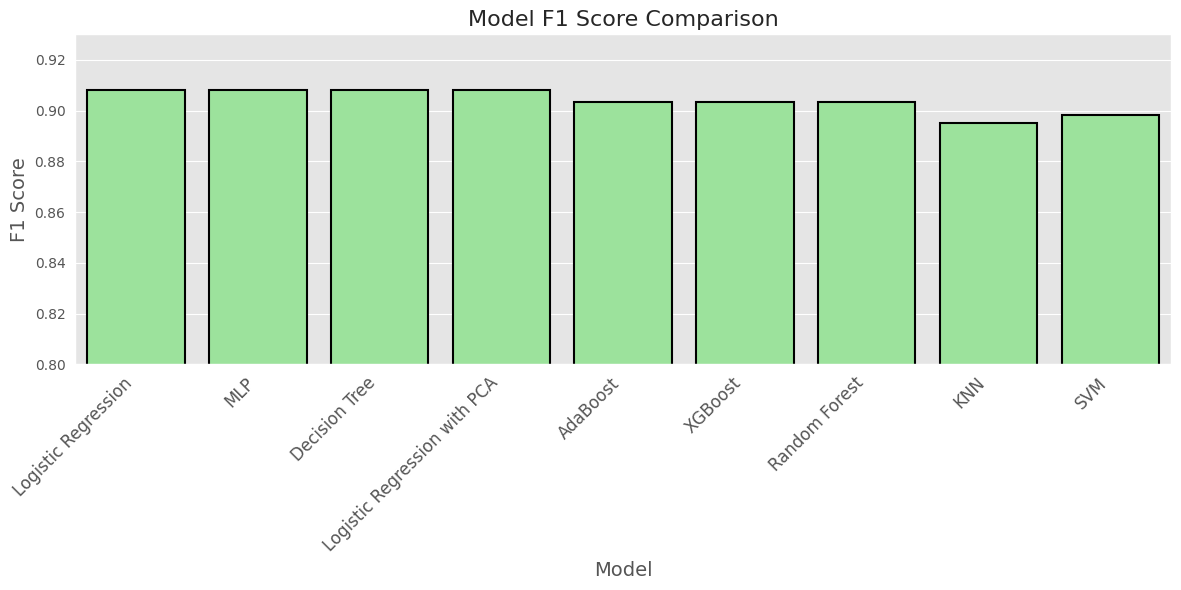

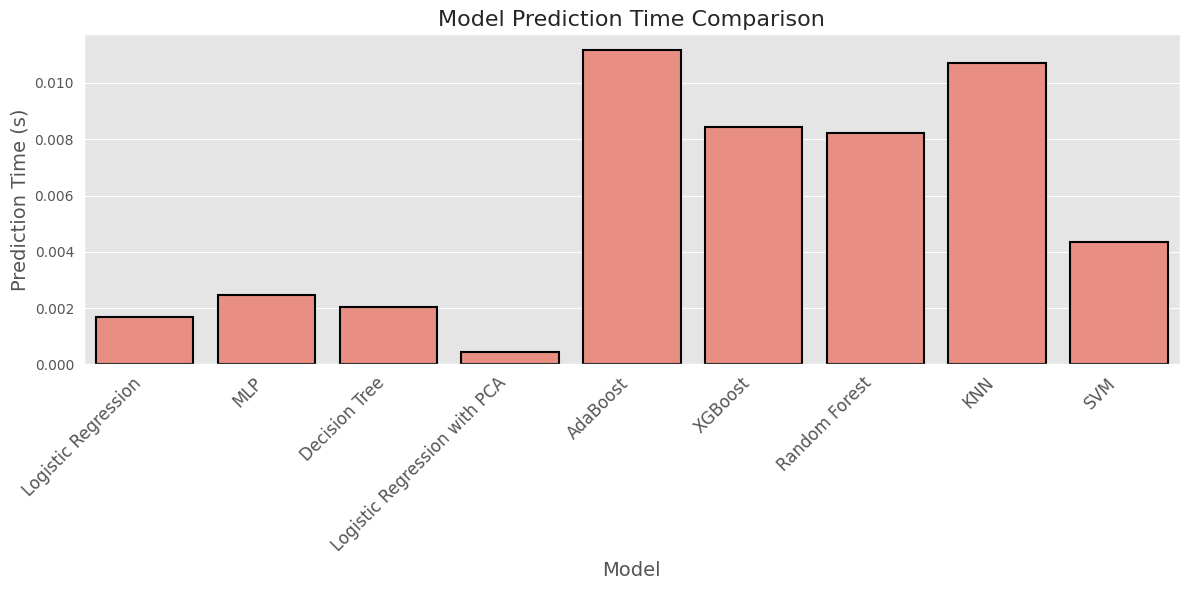

In [ ]:
# Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, color='skyblue',
            edgecolor='black', linewidth=1.5)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.8, 0.90)
plt.tight_layout()
plt.show()

# F1 Score Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, color='lightgreen',
            edgecolor='black', linewidth=1.5)
plt.title('Model F1 Score Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.ylim(0.8, 0.93)
plt.tight_layout()
plt.show()


# Prediction Time Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Prediction Time (s)', data=results_df, color='salmon',
            edgecolor='black', linewidth=1.5)
plt.title('Model Prediction Time Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Prediction Time (s)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.tight_layout()
plt.show()

### Observation

* Logistic Regression, MLP, Decision Tree, and Logistic Regression with PCA have the highest accuracy (86.18%) and F1 score (0.9081).
* Logistic Regression with PCA has the shortest training time (0.0028 seconds) and the fastest prediction time (0.0003 seconds), making it the most efficient model in terms of computational cost.
* MLP also achieves a high accuracy and F1 score but has a training time of 0.3149 seconds, which is much higher than the other models, reflecting its computational complexity. However, its prediction time (0.0018 seconds) is relatively fast.
* AdaBoost has the longest prediction time (0.0111 seconds) compared to other models, which could limit its application despite its decent accuracy.
* AdaBoost, XGBoost, and Random Forest have similar accuracy and F1 scores (85.37% and 0.9032), but they require more training time than simpler models like Logistic Regression and Decision Tree.
* SVM and KNN have the lowest accuracy (84.55%) and F1 score (0.89).
* Decision Tree and Logistic Regression have similar results in terms of accuracy and F1 score, but Logistic Regression has a slightly faster training time (0.0030 seconds). <br> <br>

Logistic Regression, MLP, and Logistic Regression with PCA offer the best balance of high accuracy, F1 score, and relatively efficient training and prediction times. On the other hand, KNN and SVM have lower accuracy and slower prediction times, while more complex models like MLP show better performance but with trade-offs in training time.